
# Generate a Readme file out of a pickle

In [15]:
import pickle
from qiskit import *
from qiskit import Aer
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt

import numpy as np

In [5]:
#read pickle
experiment_data = pickle.load(open("runs/experiments/optimizer_hyperparameters/AMSGRAD.p", "rb"))

In [9]:
name = experiment_data[0]['optimizerName']

In [14]:
experiment_data[0]

{'optimizerName': 'AMSGRAD',
 'results': [{'scoreTraining': [0.22933333333333333, 0.23733333333333334],
   'scoreTesting': [0.24, 0.216],
   'finalWeights': [array([0.69949728]), array([0.69687251])],
   'losses': [[1138.1083984375], [1120.24609375]],
   'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7fe5431a12b0>},
  {'scoreTraining': [0.23733333333333334, 0.224],
   'scoreTesting': [0.216, 0.256],
   'finalWeights': [array([0.83355152]), array([0.38760372])],
   'losses': [[1105.42578125], [1211.158203125]],
   'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7fe54154c610>},
  {'scoreTraining': [0.248, 0.22933333333333333],
   'scoreTesting': [0.184, 0.24],
   'finalWeights': [array([0.66419854, 0.85606992, 0.9771061 , 0.25376037]),
    array([0.53986236, 0.75569057, 0.89285813, 0.19990501])],
   'losses': [[1104.0146484375], [1150.5546875]],
   'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7fe54155d070>},
  {'scoreTraining': [0.232, 0.224]

In [48]:
settings = []
for i, experiment in enumerate(experiment_data):
    results = experiment['results']
    avg_train_acc = []
    avg_test_acc = []
    losses = []
    circuits = []
    settings.append(experiment['optimizerSettings'])
    for j, result in enumerate(results):
        avg_train_acc.append(result['scoreTraining'])
        avg_test_acc.append(result['scoreTesting'])
        losses.append([a[0] for a in result['losses']])
        circuits.append(result['circuit'])


{'maxiter': 20, 'tol': 1e-06, 'lr': 0.001, 'beta_1': 0.9, 'beta_2': 0.99, 'noise_factor': 1e-08, 'eps': 1e-10, 'amsgrad': True, 'snapshot_dir': None}
{'maxiter': 20, 'tol': 1e-06, 'lr': 0.001, 'beta_1': 0.9, 'beta_2': 0.99, 'noise_factor': 1e-08, 'eps': 1e-10, 'amsgrad': True, 'snapshot_dir': None}
{'maxiter': 20, 'tol': 1e-06, 'lr': 0.001, 'beta_1': 0.9, 'beta_2': 0.99, 'noise_factor': 1e-08, 'eps': 1e-10, 'amsgrad': True, 'snapshot_dir': None}
{'maxiter': 20, 'tol': 1e-06, 'lr': 0.001, 'beta_1': 0.9, 'beta_2': 0.99, 'noise_factor': 1e-08, 'eps': 1e-10, 'amsgrad': True, 'snapshot_dir': None}


In [54]:
experiment_data[0]['optimizerSettings'].values()

dict_values([20, 1e-06, 0.001, 0.9, 0.99, 1e-08, 1e-10, True, None])

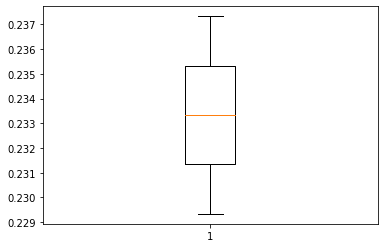

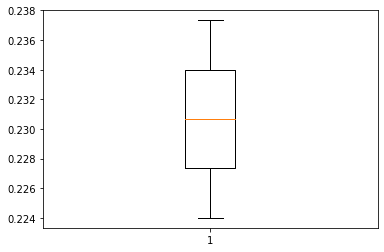

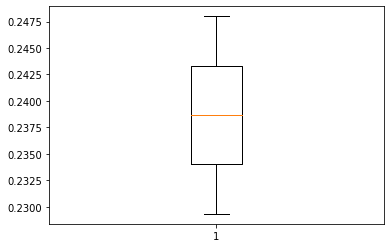

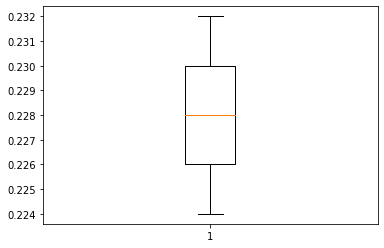

In [62]:
f = open(name + "_results.md", "w")
f.write("# Results for hyperparameter check for optimizer {0}\r\r".format(name))
f.write("Amount of queries: {0}\r\r".format(2))
f.write("Amount of plans per query: {0}\r\r".format(2))
f.write("Amount of problems: {0}\r\r".format(300))
f.write("Amount of shots: {0}\r\r".format(1024))
f.write("<hr>\r\r")
f.write("## Circuits:\r\r")
for i, circuit in enumerate(circuits):
    f.write("#### Circuit "+ str(i) + "\r\r")
    circuit.draw("mpl", filename=name+"_circuit_" + str(i) + ".png")
    f.write("![Circuit"+str(i)+"]("+name+"_circuit_" + str(i) + ".png)\r\r")
f.write("<hr>\r\r")
for i, experiment in enumerate(experiment_data):
    f.write("## Run " + str(i) +":\r\r")
    f.write("#### Optimizer settings:\r\r")
    header = "|"
    line ="|"
    for k in experiment['optimizerSettings']:
        header += k + "|"
        line += ":-:|"
    f.write(header +"\r")
    f.write(line +"\r")
    content = "|"
    for v in experiment['optimizerSettings'].values():
        content += str(v) + "|"
    f.write(content +"\r\r")
    f.write("### Average accuracy per circuit:\r\r")
    for j, result in enumerate(experiment['results']):
        f.write("#### Circuit " + str(j) + ":\r\r")
        f.write("Training Accuracy Average: {:2.2}%\r\r".format(np.average(result['scoreTraining'])))
        f.write("#### Boxplot of results:\r\r")
        fig1, ax1 = plt.subplots()
        ax1.boxplot(result['scoreTraining'])
        plt.savefig(name+str(j)+"training_boxplot.svg", format="svg", transparent=True)
        f.write("![Boxplot"+str(i)+"]("+name+str(j)+"training_boxplot.svg)\r\r")
        f.write("Testing Accuracy Average: {:2.2}%\r\r".format(np.average(result['scoreTesting'])))
        f.write("<hr>\r\r")
    

f.close()